In [26]:
# Cargue de Librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar tensorflow
import tensorflow as tf
print("TF version   : ", tf.__version__)

# Necesitaremos GPU
print("GPU available: ", tf.config.list_physical_devices('GPU'))

# keras version is 2.11.0
import keras
print("Keras version   : ", keras.__version__)

TF version   :  2.15.0
GPU available:  []
Keras version   :  2.15.0


In [27]:
#--------------------------------------------#
#       debido a que estoy usando COLAB      #
#--------------------------------------------#

from google.colab import drive
drive.mount('/content/drive') #/content/drive/MyDrive/pec2/data/xl.pickle
print("GPU available: ", tf.config.list_physical_devices('GPU'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU available:  []


In [28]:
import pandas as pd

home =  '/content/drive/MyDrive/TFM/'

file_path = home + "2017_2023DSTrabajo.xlsx"

dsXls = pd.read_excel(file_path)
dsXls.head(5)
dsXls.info()

####################################
# LIMPIEZA DE DATOS
####################################
#1. validar duplicados
dsXls.nunique()

#2. validar nulos, rellenar valores faltantes con la mediana
#dsXls.isnull().sum()
dsXls['Dist'].fillna(dsXls['Dist'].median(), inplace=True)
dsXls['Attendance'].fillna(dsXls['Attendance'].median(), inplace=True)
dsXls.isnull().sum()


####################################
# ESTADISTICAS
####################################
#dsXls.describe().T
dsXls.iloc[:,1:].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4092 non-null   datetime64[ns]
 1   Round       4092 non-null   object        
 2   Day         4092 non-null   object        
 3   Venue       4092 non-null   object        
 4   Result      4092 non-null   object        
 5   GF          4092 non-null   float64       
 6   GA          4092 non-null   float64       
 7   Opponent    4092 non-null   object        
 8   xG          4092 non-null   float64       
 9   xGA         4092 non-null   float64       
 10  Poss        4092 non-null   float64       
 11  Attendance  3212 non-null   float64       
 12  Season      4092 non-null   int64         
 13  Team        4092 non-null   object        
 14  Sh          4092 non-null   float64       
 15  SoT         4092 non-null   float64       
 16  Dist        4089 non-nul

,GF,GA,xG,xGA,Poss,Attendance,Season,Sh,SoT,Dist,SCA,KP,PPA,CrsPA
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000
mean,1.377810,1.377810,1.346163,1.346163,50.001222,36912.650049,2019.214076,12.317693,4.102884,17.675318,21.840176,9.215054,7.901760,1.869501
std,1.277631,1.277631,0.796551,0.796551,12.726702,15301.262664,1.566615,5.427259,2.437269,3.038064,9.897661,4.401972,4.553291,1.613642
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,2017.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,0.700000,41.000000,29296.000000,2018.000000,8.000000,2.000000,15.700000,14.000000,6.000000,5.000000,1.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,32092.500000,2019.000000,12.000000,4.000000,17.600000,21.000000,9.000000,7.000000,2.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,51237.000000,2021.000000,16.000000,6.000000,19.500000,28.000000,12.000000,10.000000,3.000000
max,9.000000,9.000000,5.900000,5.900000,82.000000,83222.000000,2022.000000,36.000000,15.000000,35.000000,66.000000,34.000000,33.000000,12.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


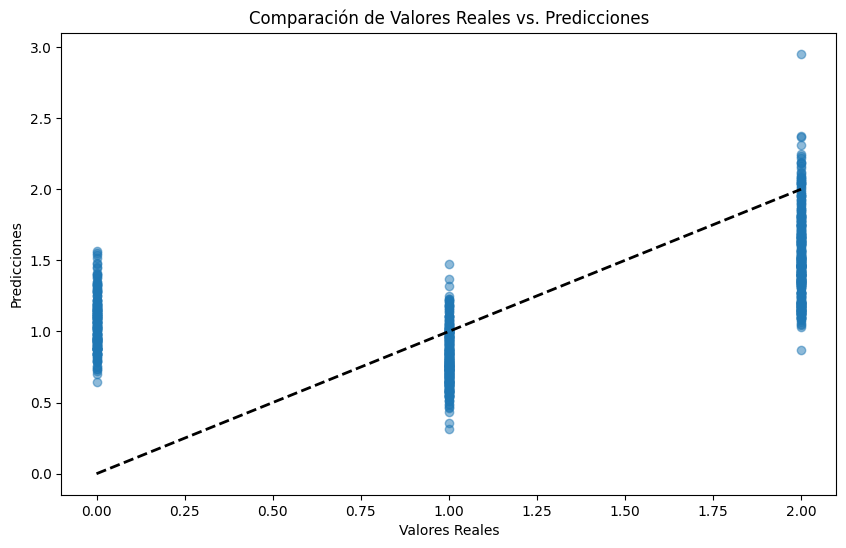

MSE: 0.4263752306424075, R^2: 0.29983627663982193


In [29]:
###REGRESIÓN LINEAL ###########################################
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

dataReg = dsXls.drop(['Date', 'Round', 'Day', 'Venue', 'Result', 'Team', 'Opponent'], axis=1)

from sklearn.preprocessing import OneHotEncoder
# Estandarizando los datos
scaler = StandardScaler()

# Aplicando PCA
pca = PCA()
X_pcaReg = pca.fit_transform(dataReg)

from sklearn.model_selection import train_test_split

# Codificar las etiquetas categóricas
encoderREG = LabelEncoder()
y_encodedReg = encoderREG.fit_transform(dsXls[['Result']]) #dsXls['Result'] #encoderREG.fit_transform(dsXls[['Result']])


# Dividir el dataset
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X_pcaReg, y_encodedReg, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística para multiclase
#model = LogisticRegression(max_iter=10000, multi_class='ovr')
model = LinearRegression()
model.fit(X_trainReg, y_trainReg) #model.fit(X_train, y_train)
y_predReg = model.predict(X_testReg)

#print("dats",y_predReg)
#labels = ['D', 'L', 'W']
#plt.xticks([0, 1, 2], labels)
plt.figure(figsize=(10, 6))
plt.scatter(y_testReg, y_predReg, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.plot([y_testReg.min(), y_testReg.max()], [y_testReg.min(), y_testReg.max()], 'k--', lw=2)  # Línea de identidad
plt.show()


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

## Matriz de confusión
#cmReg = confusion_matrix(y_testReg, y_predReg)
#disp = ConfusionMatrixDisplay(confusion_matrix=cmReg, display_labels=['W','L','D'])
#disp.plot()
#plt.show()

## Reporte de clasificación
#print("Classification Report:\n", classification_report(y_testReg, y_predReg))

# Validación cruzada
#cross_val_accuracy = cross_val_score(model, X_pcaReg, y_encodedReg, cv=13, scoring='accuracy')
#print("Cross-validated Accuracy:", cross_val_accuracy.mean())

mse = mean_squared_error(y_testReg, y_predReg) #mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_testReg, y_predReg)#r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R^2: {r2}')

In [30]:
#regresión logistica
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# X_pcaReg, y_encodedReg
#X_trainReg, X_testReg, y_trainReg, y_testReg

# Crear y ajustar el modelo de regresión logística model = LogisticRegression(max_iter=10000, multi_class='ovr')
modelRL = LogisticRegression(max_iter=10000, multi_class='ovr')
modelRL.fit(X_trainReg, y_trainReg)

# Obtener predicciones de etiquetas de clase (no probabilidades)
y_predRL = modelRL.predict(X_testReg)

# Generar y mostrar la matriz de confusión
cmRl = confusion_matrix(y_testReg, y_predRL)
print(cmRl)

disp = ConfusionMatrixDisplay(confusion_matrix=cmRl)
print(disp)

####---
# Reporte de clasificación
print("Classification Report:\n", classification_report(y_testReg, y_predRL))

# Validación cruzada
cross_val_accuracyRl = cross_val_score(modelRL, X_pcaReg, y_encodedReg, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", cross_val_accuracyRl.mean())

# reporte de clasificación

reportRL = classification_report(y_testReg, y_predRL)

print(reportRL)


[[184   1   0]
 [  0 289   0]
 [  0   0 345]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       1.00      1.00      1.00       289
           2       1.00      1.00      1.00       345

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

Cross-validated Accuracy: 0.9948703022052655
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       1.00      1.00      1.00       289
           2       1.00      1.00      1.00       345

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

